**PARTIE 1:**

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow import keras

**IMPORTATION DES DONNEES**

In [ ]:

boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


**NORMALISATION DES DONNEES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(train_data)
training_dataset_x = mms.transform(train_data)
test_dataset_x = mms.transform(test_data)

**ENTRAINEMENT DU MODELE**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# create keras model and add the layers
model = Sequential(name='BostonHousingPrices')
model.add(Dense(100, input_dim = training_dataset_x.shape[1], activation='relu', name='Hidden-1'))
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(100, activation='relu', name='Hidden-3'))
model.add(Dense(1, activation='linear', name='Output'))

In [ ]:


# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# fit the model and assign it to 'hist' variable
hist = model.fit(training_dataset_x, train_labels, batch_size=102, epochs=1200, validation_split=0.2)

Epoch 1/1200
4/4 [==============================] - 1s 43ms/step - loss: 552.1276 - mae: 21.6002 - val_loss: 581.9639 - val_mae: 22.2472
Epoch 2/1200
4/4 [==============================] - 0s 9ms/step - loss: 494.1320 - mae: 20.1211 - val_loss: 500.3969 - val_mae: 20.2463
Epoch 3/1200
4/4 [==============================] - 0s 10ms/step - loss: 407.2927 - mae: 17.7708 - val_loss: 382.1003 - val_mae: 16.9581
Epoch 4/1200
4/4 [==============================] - 0s 17ms/step - loss: 298.1308 - mae: 14.2506 - val_loss: 270.9467 - val_mae: 13.3947
Epoch 5/1200
4/4 [==============================] - 0s 9ms/step - loss: 205.4566 - mae: 11.1810 - val_loss: 178.0693 - val_mae: 10.5380
Epoch 6/1200
4/4 [==============================] - 0s 9ms/step - loss: 148.4793 - mae: 9.4645 - val_loss: 152.3894 - val_mae: 9.6948
Epoch 7/1200
4/4 [==============================] - 0s 10ms/step - loss: 131.4731 - mae: 8.8216 - val_loss: 134.3066 - val_mae: 8.9676
Epoch 8/1200
4/4 [==============================

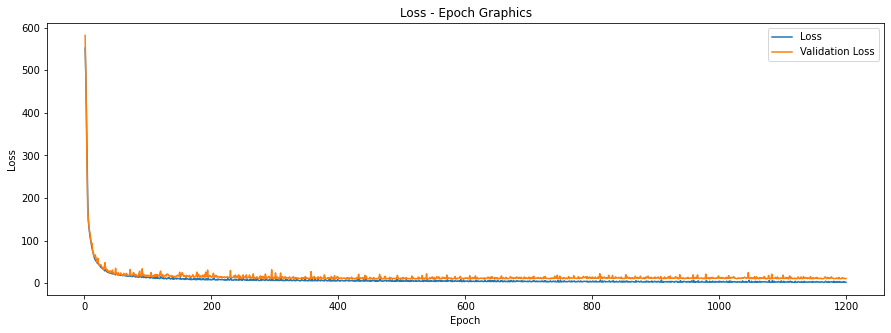

In [ ]:

# this part is for drawing the graphs
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

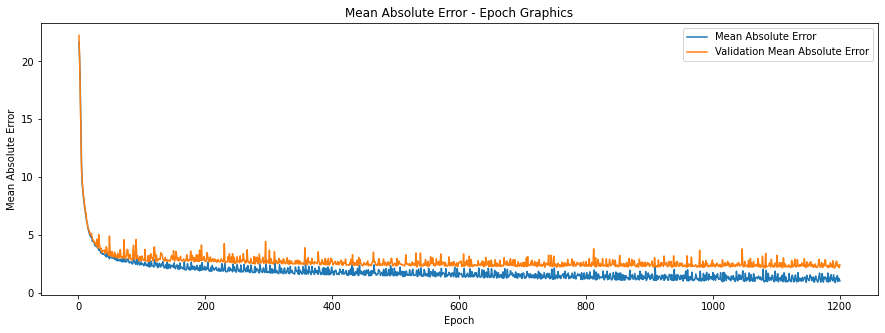

In [ ]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

**VALIDATION**

In [ ]:
# testing the model with using evaluate method
test_result = model.evaluate(test_dataset_x, test_labels)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

4/4 [==============================] - 0s 3ms/step - loss: 16.1309 - mae: 2.6522
loss ---> 16.130905151367188
mae ---> 2.65215802192688


In [ ]:
from sklearn.metrics import r2_score
test_pred=model.predict(test_dataset_x)

In [ ]:
r2 = r2_score(test_labels,test_pred)

In [ ]:
r2

0.806221064531099

In [ ]:

# creating simple data group for the estimation part then predicting the results
predict_data = np.array([0.63796, 0.00, 8.140, 0, 0.5380, 6.0960, 84.50, 4.4619, 4, 307.0, 21.00, 380.02, 10.26])
predict_data = mms.transform(predict_data.reshape(1, -1))
predict_result = model.predict(predict_data)
print(f'Predicted result: {predict_result[0, 0]}')

Predicted result: 17.224899291992188
